# Introduction
This report analyzes U.S. death and population data to examine trends in mortality rates and the leading causes of death over time. Using Pandas, I cleaned and merged datasets, normalized death rates by population, and compared state-level trends to national patterns. Key findings include the top causes of death and year-by-year changes, providing insights into how mortality risks evolve across the United States.

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Brief description of the two datasets used in the analysis

### Leading Causes of Death (CSV):
This dataset contains information on the leading causes of death in the United States, including:

- **Year**: The year the data was recorded.
- **113 Cause Name**: The detailed cause of death.
- **Cause Name**: A simplified version of the cause of death.
- **State**: The U.S. state where the deaths occurred.
- **Deaths**: The number of deaths recorded for that cause in the state for the specified year.
- **Age-adjusted Death Rate**: The death rate standardized by age to compare across populations.

In [2]:
# Load the CSV file (NCHS_-_Leading_Causes_of_Death__United_States)
file_path_death_data = 'NCHS_-_Leading_Causes_of_Death__United_States.csv'
death_data = pd.read_csv(file_path_death_data)

In [4]:
death_data.State.unique()

array(['Vermont', 'District of Columbia', 'Arizona', 'South Dakota',
       'Washington', 'Iowa', 'New York', 'Massachusetts', 'New Jersey',
       'California', 'North Dakota', 'Rhode Island', 'Alaska', 'Oregon',
       'Wyoming', 'Idaho', 'Connecticut', 'Minnesota', 'Illinois',
       'Montana', 'New Hampshire', 'Hawaii', 'Maryland', 'Florida',
       'Colorado', 'Nevada', 'Utah', 'Delaware', 'New Mexico', 'Nebraska',
       'Ohio', 'Michigan', 'Maine', 'Tennessee', 'Pennsylvania', 'Texas',
       'Georgia', 'Louisiana', 'Indiana', 'United States', 'Mississippi',
       'South Carolina', 'Virginia', 'Kansas', 'Wisconsin',
       'North Carolina', 'Alabama', 'Kentucky', 'Missouri', 'Oklahoma',
       'West Virginia', 'Arkansas'], dtype=object)

In [4]:
#Unique values from the 'Cause Name' column
death_data['Cause Name'].unique()

array(['Kidney disease', 'Suicide', "Alzheimer's disease",
       'Influenza and pneumonia', 'Diabetes', 'CLRD',
       'Unintentional injuries', 'Stroke', 'Heart disease', 'Cancer',
       'All causes'], dtype=object)

#### Explain the cause of death data
the cause of death in this dataset has two categories
- the first one is **'All causes'** which contains all causes of death in each state.
- the second is **'Other Causes'**: These would be specific 10 causes including 'Kidney disease', 'Suicide', "Alzheimer's disease", 'Influenza and pneumonia', 'Diabetes', 'CLRD', 'Unintentional injuries', 'Stroke', 'Heart disease', and 'Cancer' in each state.

### Population Estimates (Excel):
This dataset provides annual population estimates for different regions in the United States, including:

- **Geographic Area**: Lists the United States as a whole, followed by regions and individual states (e.g., Alabama, Alaska, Arizona, etc.).
- **Census and Estimates Base**: The population counts from the 2010 Census and the base estimates for the population as of April 1, 2010.
- **Annual Population Estimates (2010-2018)**: The population estimates for each year, starting from 2010 to 2018.

In [5]:
# Load the Excel file (nst-est2018-01)
file_path_population_data = 'nst-est2018-01.xlsx'

# Bypass unnecessary rows and set column names for easier access later
colnames = ["Geographic Area","April 1, 2010_Census","April 1, 2010_Estimates Base","Population Estimate (as of July 1)_2010",
           "Population Estimate (as of July 1)_2011","Population Estimate (as of July 1)_2012","Population Estimate (as of July 1)_2013",
           "Population Estimate (as of July 1)_2014","Population Estimate (as of July 1)_2015","Population Estimate (as of July 1)_2016",
           "Population Estimate (as of July 1)_2017","Population Estimate (as of July 1)_2018"]
population_data = pd.read_excel(file_path_population_data, skiprows=4, skipfooter=5, header=None, names=colnames)

In [6]:
population_data.head(4)

,Geographic Area,"April 1, 2010_Census","April 1, 2010_Estimates Base",Population Estimate (as of July 1)_2010,Population Estimate (as of July 1)_2011,Population Estimate (as of July 1)_2012,Population Estimate (as of July 1)_2013,Population Estimate (as of July 1)_2014,Population Estimate (as of July 1)_2015,Population Estimate (as of July 1)_2016,Population Estimate (as of July 1)_2017,Population Estimate (as of July 1)_2018
0,United States,308745538.0,308758105.0,309326085.0,311580009.0,313874218.0,316057727.0,318386421.0,320742673.0,323071342.0,325147121.0,327167434.0
1,Northeast,55317240.0,55318430.0,55380645.0,55600532.0,55776729.0,55907823.0,56015864.0,56047587.0,56058789.0,56072676.0,56111079.0
2,Midwest,66927001.0,66929743.0,66974749.0,67152631.0,67336937.0,67564135.0,67752238.0,67869139.0,67996917.0,68156035.0,68308744.0
3,South,114555744.0,114563045.0,114867066.0,116039399.0,117271075.0,118393244.0,119657737.0,121037542.0,122401186.0,123598424.0,124753948.0


#### In this analysis, 
we will mainly use the Population Estimate (as of July 1) to normalize deaths data. This ensures that mortality trends are accurately compared across regions, accounting for population size changes between 2010 and 2018.

### 

# Data Cleaning 
Removing Missing Values and Stripping State Names

In [7]:
# Drop rows with missing values
population_data = population_data.dropna()

In [8]:
# Strip any leading or trailing periods in state names for both datasets
population_data.loc[:,'Geographic Area'] = population_data['Geographic Area'].str.strip(".")
death_data['State'] = death_data['State'].str.strip()

In [9]:
# Display first few rows of population data for validation
population_data.head(3)

,Geographic Area,"April 1, 2010_Census","April 1, 2010_Estimates Base",Population Estimate (as of July 1)_2010,Population Estimate (as of July 1)_2011,Population Estimate (as of July 1)_2012,Population Estimate (as of July 1)_2013,Population Estimate (as of July 1)_2014,Population Estimate (as of July 1)_2015,Population Estimate (as of July 1)_2016,Population Estimate (as of July 1)_2017,Population Estimate (as of July 1)_2018
0,United States,308745538.0,308758105.0,309326085.0,311580009.0,313874218.0,316057727.0,318386421.0,320742673.0,323071342.0,325147121.0,327167434.0
1,Northeast,55317240.0,55318430.0,55380645.0,55600532.0,55776729.0,55907823.0,56015864.0,56047587.0,56058789.0,56072676.0,56111079.0
2,Midwest,66927001.0,66929743.0,66974749.0,67152631.0,67336937.0,67564135.0,67752238.0,67869139.0,67996917.0,68156035.0,68308744.0


# Normalizing 
Deaths by Population for Comparative Analysis

In [10]:
# Prepare population data to have a long format with the year as a column
population_data_cleaned = population_data.melt(id_vars=['Geographic Area'], 
                                               var_name='Population Data Type', 
                                               value_name='Population')

# Extract the year from the Population Data Type column
population_data_cleaned['Year'] = population_data_cleaned['Population Data Type'].str.extract(r'(\d{4})').astype(int)

# Now filter the population data to only keep the July 1 population estimates
population_data_filtered = population_data_cleaned[population_data_cleaned['Population Data Type'].str.contains('July 1')]

# rename Geographic Area" to "State" for easy to use
population_data_filtered = population_data_filtered.rename(columns={"Geographic Area":"State"})

# Merge death data with population data on Geographic Area and Year
merged_data = pd.merge(death_data, population_data_filtered[['State', 'Year', 'Population']], 
                       on=['State', 'Year'], how='left')

# Calculate death rate per 100,000 people for easier comparison between states
merged_data['Death Rate per 100,000'] = (merged_data['Deaths'] / merged_data['Population']) * 100000

# Convert 'Year' column to datetime for easier time-based operations
merged_data['Year'] = pd.to_datetime(merged_data.Year, format='%Y')

# Create a copy of the merged dataset for further manipulation and analysis
death_data = merged_data.copy()

# Show the first few rows for verification
death_data.head(3)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Population,"Death Rate per 100,000"
0,2012-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6,626063.0,3.354295
1,2016-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7,623644.0,4.810437
2,2013-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8,626212.0,4.790710


# Q1: Are Americans facing increasing, decreasing, or steady likelihood of death?

In [11]:
# Filter for U.S.-wide data (excluding state-level breakdown) and for "All Causes"
death_data_us_all_causes = death_data[(death_data.State == 'United States')&(death_data['Cause Name'] == 'All causes')].copy()

In [12]:
# Sort data by year to observe changes in death rates
death_data_us_all_causes.sort_values(by="Year", inplace=True)

In [13]:
# Show death_data_us_all_causes data frame
display(death_data_us_all_causes)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Population,"Death Rate per 100,000"
10074,1999-01-01,All Causes,All causes,United States,2391399,875.6,NaN,NaN
10062,2000-01-01,All Causes,All causes,United States,2403351,869.0,NaN,NaN
10043,2001-01-01,All Causes,All causes,United States,2416425,858.8,NaN,NaN
10039,2002-01-01,All Causes,All causes,United States,2443387,855.9,NaN,NaN
10015,2003-01-01,All Causes,All causes,United States,2448288,843.5,NaN,NaN
9929,2004-01-01,All Causes,All causes,United States,2397615,813.7,NaN,NaN
9932,2005-01-01,All Causes,All causes,United States,2448017,815.0,NaN,NaN
9841,2006-01-01,All Causes,All causes,United States,2426264,791.8,NaN,NaN
9779,2007-01-01,All Causes,All causes,United States,2423712,775.3,NaN,NaN
9776,2008-01-01,All Causes,All causes,United States,2471984,774.9,NaN,NaN


Text(0.5, 1.0, 'Comparison of Age-adjusted Death Rate and Death Rate per 100,000 (1999-2016)')

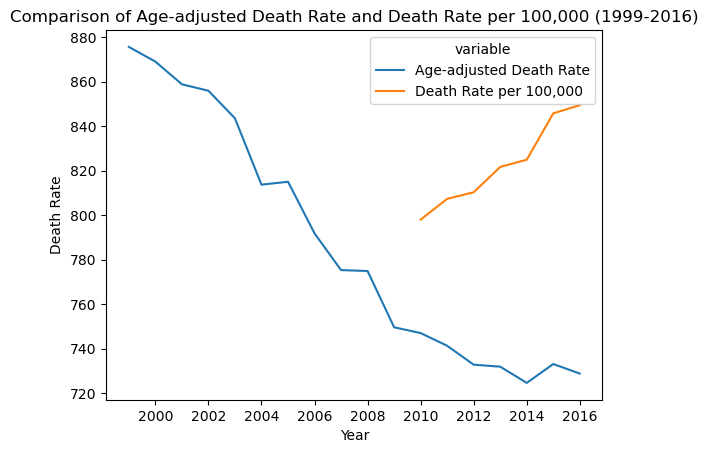

In [14]:
#Filter the necessary columns
death_data_us_all_causes_filter = death_data_us_all_causes[["Year","Age-adjusted Death Rate","Death Rate per 100,000"]]

# Create a line plot comparing age-adjusted death rate and death rate per 100,000 over time
death_data_us_all_causes_plot = death_data_us_all_causes_filter.melt(id_vars=['Year'], value_name="Death Rate")

ax = sns.lineplot(data=death_data_us_all_causes_plot, x="Year", y="Death Rate", hue="variable")
ax.set_title("Comparison of Age-adjusted Death Rate and Death Rate per 100,000 (1999-2016)")

## Data Interpretation
- **Americans are facing a decreasing likelihood of death when accounting for age.** The Age-adjusted Death Rate (blue line) shows a consistent downward trend from 1999 to 2016, indicating that improvements in healthcare, prevention, and treatment have led to a lower risk of death, after adjusting for changes in the population's age distribution.
- However, the Death Rate per 100,000 (orange line) has been increasing, especially after 2010. This indicates that while the population is getting older (which naturally increases the death rate), the age-adjusted data confirms that the actual risk of dying, independent of age, has been declining. **Therefore, the apparent increase in the overall death rate is driven by the aging population, not by an increase in the inherent risk of death.**

### 

## Deep dive analysis by
doing an analysis at **regions-level information**.

In [15]:
death_data_state_all_causes = death_data[(death_data.State != 'United States')&(death_data['Cause Name'] == 'All causes')].copy()

In [16]:
# U.S. regions lists
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 
             'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']
midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 
           'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
south = ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 
         'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 
         'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
        'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']

# Create a function to classify the states into regions
def classify_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        print(state,"error")
        return 'Unknown'
        
# Apply the classification to the pandas Series
death_data_state_all_causes["regions"] = death_data_state_all_causes.State.apply(classify_region)

In [17]:
#Filter the necessary columns
death_data_filtered = death_data_state_all_causes[["Year", "Age-adjusted Death Rate", "Death Rate per 100,000", "regions"]]

#Use the `melt` function to reshape the data for easy plotting
# The 'melt' function is used to convert the wide-format data into long-format
death_data_melted = death_data_filtered.melt(id_vars=['Year', 'regions'], 
                                             value_name="Death Rate", 
                                             var_name="Rate Type")

In [18]:
# Show death_data_melted data frame
death_data_melted.head(3)

,Year,regions,Rate Type,Death Rate
0,2016-01-01,West,Age-adjusted Death Rate,572.0
1,2011-01-01,West,Age-adjusted Death Rate,584.9
2,2012-01-01,West,Age-adjusted Death Rate,586.5


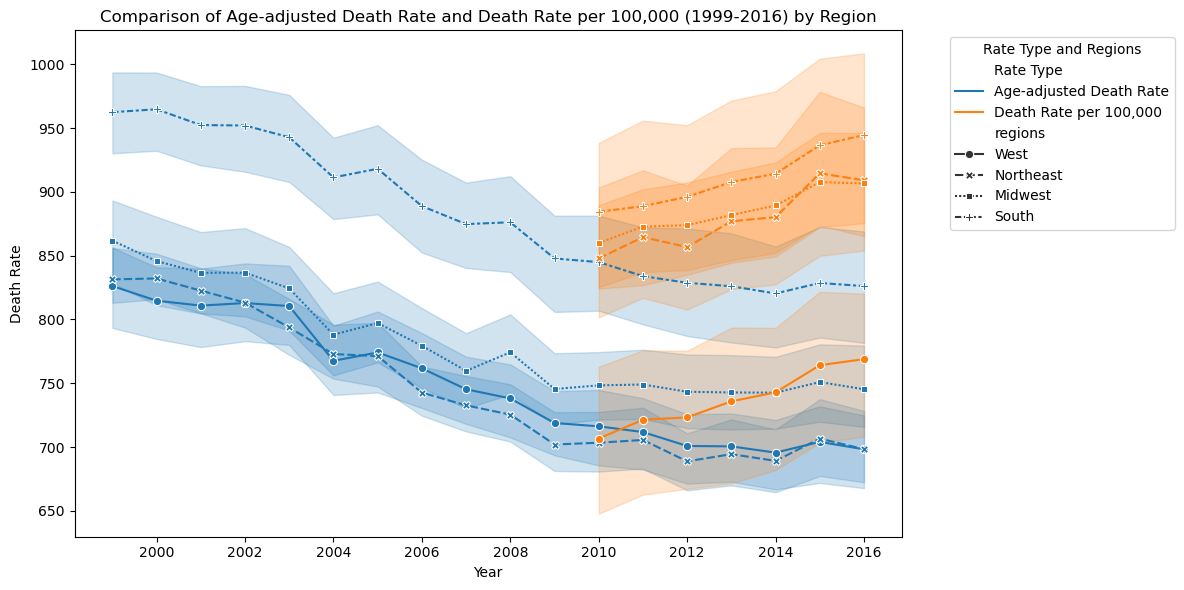

In [19]:
# Create a line plot comparing age-adjusted death rates and death rates per 100,000 across regions (1999-2016) with markers and a clear legend
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=death_data_melted, x="Year", y="Death Rate", hue="Rate Type", style="regions", markers=True)

ax.set_title("Comparison of Age-adjusted Death Rate and Death Rate per 100,000 (1999-2016) by Region")
ax.set_xlabel("Year")
ax.set_ylabel("Death Rate")
plt.legend(title="Rate Type and Regions", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Data Interpretation
The U.S. overall trends align with the regional data in terms of age-adjusted improvement and a rising Death Rate per 100,000 due to an aging population.

**Age-adjusted Death Rate**: All regions show a decline from 1999 to 2016, indicating better healthcare outcomes. The Northeast has the lowest rate, while the South remains the highest, though both are improving.

**Death Rate per 100,000**: All regions see an increase, especially after 2010, driven by an aging population.

### 

# Q2: What are the four leading causes of death for Americans?

In [20]:
# Exclude the "All Causes" category to focus on specific causes of death
death_data_us_exclude_all_causes = death_data[(death_data.State == 'United States')&(death_data['Cause Name'] != 'All causes')].copy()

In [21]:
# Group by 'Cause Name' and sum the total deaths for each cause
top_causes_nationwide = death_data_us_exclude_all_causes.groupby('Cause Name')['Deaths'].sum().reset_index()

In [22]:
# Rank the causes based on the total number of deaths
rank_top_causes_nationwide = top_causes_nationwide.sort_values(by="Deaths",ascending=False).reset_index(drop=True).reset_index(drop=True).reset_index(names= "rank")
# Add a 'rank' column to indicate the position of each cause
rank_top_causes_nationwide['rank'] +=1

In [23]:
# Display the ranked causes of death
display(rank_top_causes_nationwide)

,rank,Cause Name,Deaths
0,1,Heart disease,11575183
1,2,Cancer,10244536
2,3,Stroke,2580140
3,4,CLRD,2434726
4,5,Unintentional injuries,2177884
5,6,Alzheimer's disease,1373412
6,7,Diabetes,1316379
7,8,Influenza and pneumonia,1038969
8,9,Kidney disease,807980
9,10,Suicide,649843


## Data Interpretation: The four leading causes of death for Americans are

- **Rank1: Heart disease** (11,575,183 deaths)

- **Rank2: Cancer** (10,244,536 deaths)

- **Rank3: Stroke** (2,580,140 deaths)

- **Rank4: Chronic lower** respiratory disease (CLRD) (2,434,726 deaths)

### 

# Q3: Do individual states show the same four leading causes of death?

In [24]:
# This focuses the data on individual states and specific causes of death
death_data_exclude_us_and_all_causes = death_data[(death_data.State != 'United States')&(death_data['Cause Name'] != 'All causes')].copy()

#### Compare State-Level Leading Causes of Death to Nationwide Data. **Create a dataframe that ranks causes of death by state**

In [25]:
state_ranks = []
for s in death_data_exclude_us_and_all_causes.State.unique():
    all_rank = death_data_exclude_us_and_all_causes[death_data_exclude_us_and_all_causes['State'] == s]\
                .groupby('Cause Name')['Deaths']\
                .sum()\
                .nlargest(10)\
                .reset_index()
    state_data = {'State': s}
    for i in range(10):
        rank_column = f'rank{i+1}'
        if i < len(all_rank):
            state_data[rank_column] = all_rank.iloc[i, 0]
        else:
            state_data[rank_column] = None
    state_ranks.append(state_data)
state_df = pd.DataFrame(state_ranks)

In [26]:
state_df.head(3)

,State,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10
0,Vermont,Cancer,Heart disease,CLRD,Unintentional injuries,Stroke,Alzheimer's disease,Diabetes,Suicide,Influenza and pneumonia,Kidney disease
1,District of Columbia,Heart disease,Cancer,Stroke,Unintentional injuries,Diabetes,CLRD,Alzheimer's disease,Influenza and pneumonia,Kidney disease,Suicide
2,Arizona,Heart disease,Cancer,Unintentional injuries,CLRD,Stroke,Alzheimer's disease,Diabetes,Suicide,Influenza and pneumonia,Kidney disease


In [27]:
# Extract the top 4 causes of death for Americans
us_top4 = rank_top_causes_nationwide["Cause Name"].head(4).tolist()

# Compare the top 4 causes of death for Americans with those of each state
def compare_top4(row, us_top4):
    state_top4 = [row['rank1'], row['rank2'], row['rank3'], row['rank4']]
    return set(state_top4) == set(us_top4)

# Add a comparison result column
state_df['Matches US Top 4'] = state_df.apply(compare_top4, axis=1, us_top4=us_top4)

In [28]:
# Display the count of states matching the national top 4 causes of death
pd.DataFrame(state_df.groupby('Matches US Top 4')['State'].count()).reset_index().rename(columns={"State":"Count"})

,Matches US Top 4,Count
0,False,21
1,True,30


## Data Interpretation: 
- 30 states have a top 4 cause of death that do match the U.S. leading causes.
- 21 states have a top 4 cause of death that do ***not*** match the U.S. leading causes.

### 

## Deep dive analysis by 
using **Kendall’s Tau** to compare the ordinal rankings of causes of death at the national level versus each state. This rank-based measure checks how well two rankings match, but it also considers the magnitude of differences.

# 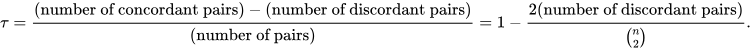

In [29]:
# Calculate Correlation Between National and State-Level Rankings
from scipy.stats import kendalltau

In [30]:
# Extract national ranks and compare each state to national
national_ranks = rank_top_causes_nationwide["Cause Name"].tolist()
rank_columns = [f"rank{i+1}" for i in range(10)]

# Calculate Kendall's Tau correlation between national ranks and each state's ranks
kendall_results = {}

for index, row in state_df.iterrows():
    state_ranks = row[rank_columns].tolist()
    tau, p_value = kendalltau(national_ranks, state_ranks)
    kendall_results[row['State']] = tau
    
# Create a dataframe of Kendall's Tau results
kendall_results_df = pd.DataFrame(list(kendall_results.items()), columns=['State', 'Kendall Tau'])

In [31]:
kendall_results_df.head(3)

,State,Kendall Tau
0,Vermont,0.155556
1,District of Columbia,0.333333
2,Arizona,0.777778


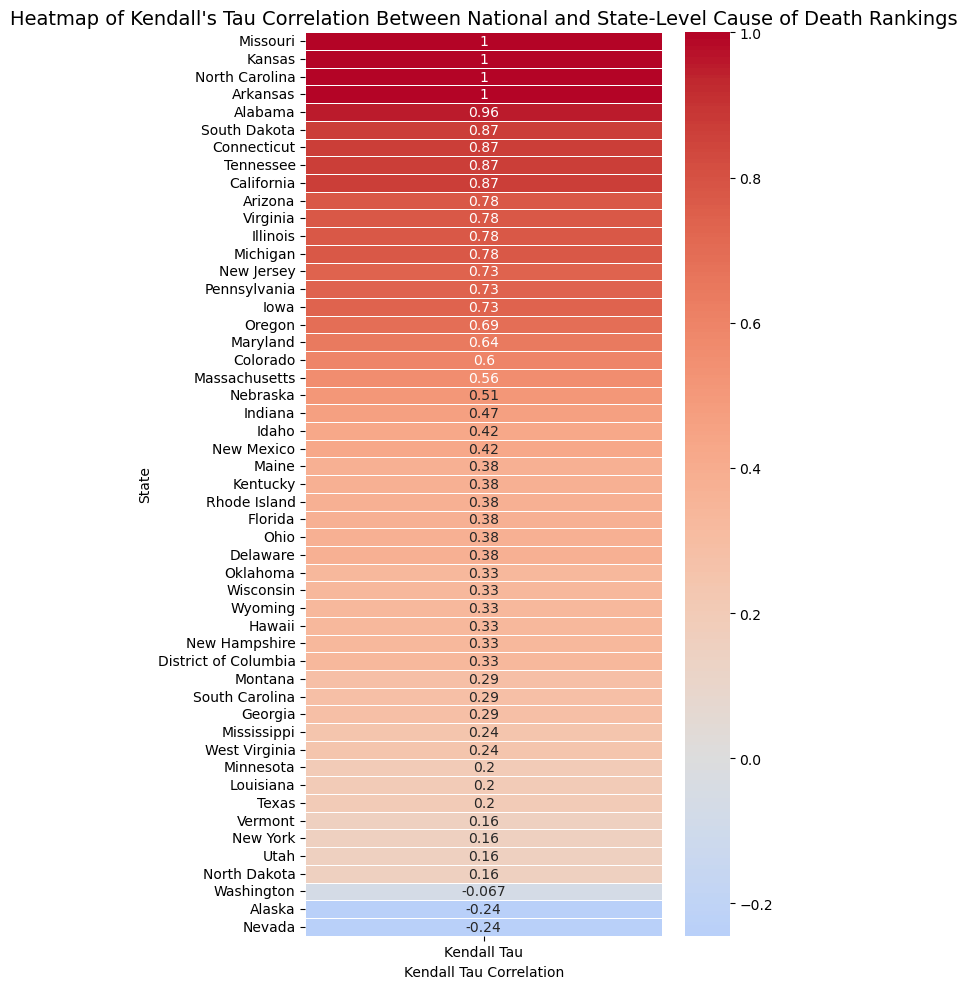

In [32]:
# Set up the heatmap visualization
plt.figure(figsize=(6.5, 10))
heatmap = sns.heatmap(kendall_results_df.pivot_table(index='State', values='Kendall Tau').sort_values(by='Kendall Tau', ascending=False), 
                      cmap='coolwarm', annot=True, center=0, linewidths=.5)

# Add labels and title
plt.title("Heatmap of Kendall's Tau Correlation Between National and State-Level Cause of Death Rankings", fontsize=14)
plt.xlabel('Kendall Tau Correlation')
plt.ylabel('State')

# Display the heatmap
plt.tight_layout()
plt.show()

## Data Interpretation:
A Kendall's Tau correlation close to 1 indicates strong agreement, while a correlation closer to -1 indicates a strong disagreement. A correlation around 0 suggests little to no relationship between the rankings.

## Overall Insight:
- States like Kansas, North Carolina, Missouri, Arkansas (Tau = 1.000) have rankings of causes of death that are exactly the same as the national level.
- Alabama (Tau = 0.955) shows a very strong correlation, meaning its rankings are very close to the national rankings.
- On the other hand, Alaska and Nevada (Tau = -0.244) show a negative correlation, indicating that the rankings in these states deviate significantly from the national rankings.
- States with a Tau value near 0 like Washington (Tau = -0.066) have rankings that are almost uncorrelated with the national level, showing no clear matching pattern.

# Q4: Are there year-by-year changes in the four leading causes of death nationwide?

In [33]:
# Initialize an empty list to store the yearly rankings
year_ranks = []

# Loop through each unique year in the dataset
for y in death_data_us_exclude_all_causes.Year.unique():
    # For each year, group by 'Cause Name' and sum the number of deaths, 
    # then extract the top 10 causes of death based on the total number of deaths
    all_rank = death_data_us_exclude_all_causes[death_data_us_exclude_all_causes['Year'] == y]\
                .groupby('Cause Name')['Deaths']\
                .sum()\
                .nlargest(10)\
                .reset_index()
    
    # Create a dictionary to store the year and rankings
    year_data = {'Year': y}
    
    # Loop through the top 10 causes for that year and assign them to a rank
    for i in range(10):
        rank_column = f'rank{i+1}'  # Dynamically create rank columns (rank1, rank2, ...)
        if i < len(all_rank):
            # If the rank exists, assign the cause name to the appropriate rank column
            year_data[rank_column] = all_rank.iloc[i, 0]
        else:
            # If fewer than 10 causes, fill remaining ranks with None
            year_data[rank_column] = None
    
    # Append the dictionary containing the year and ranks to the year_ranks list
    year_ranks.append(year_data)

# Convert the list of dictionaries into a DataFrame for further analysis
year_df = pd.DataFrame(year_ranks)

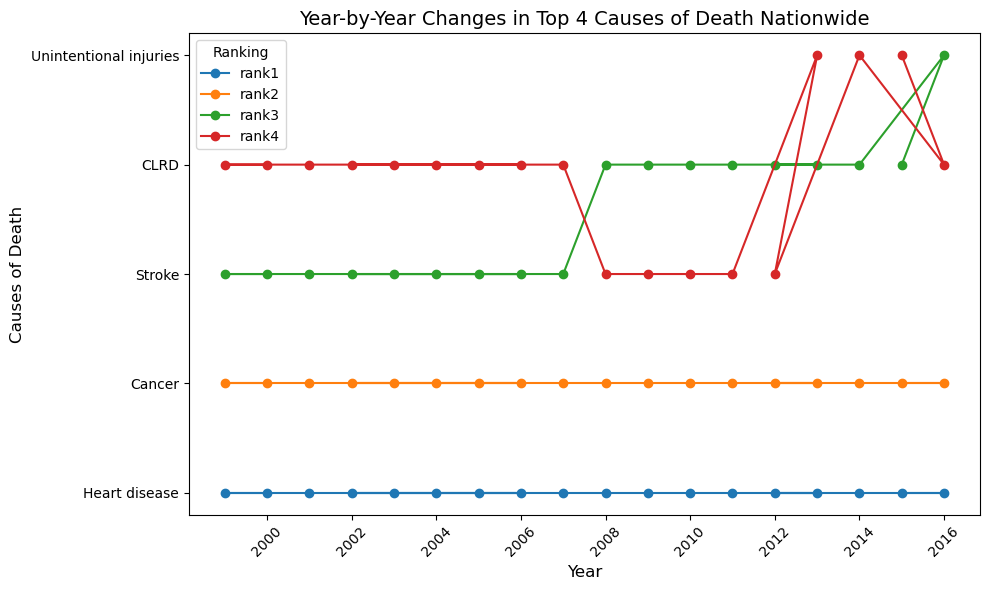

In [34]:
# Visualization 1: Line Chart for top 4 causes of death changes over time
fig, ax = plt.subplots(figsize=(10, 6))
for rank in ['rank1', 'rank2', 'rank3', 'rank4']:
    ax.plot(year_df['Year'], year_df[rank], marker='o', label=rank)

# Add labels and title
ax.set_title('Year-by-Year Changes in Top 4 Causes of Death Nationwide', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Causes of Death', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Ranking")
plt.tight_layout()
plt.show()

## Data Interpretation:
- **Heart disease (rank 1, blue)** **remained consistently** the leading cause of death throughout the years shown (2000–2016).
- **Cancer (rank 2, orange)** also **remained constant** as the second leading cause of death throughout the period.
- Stroke (rank 3, green) was consistently ranked third until around 2012, after which its ranking **fluctuated** with "Unintentional injuries" and dropped to rank 4 by 2016.
- Chronic Lower Respiratory Disease (CLRD) (rank 4, red) held the **fourth position until around 2011**, after which it moved between ranks 3 and 4 as it swapped places with "Stroke" and "Unintentional injuries."

## 

## Conclusion

This analysis of U.S. death and population data provides important insights into national and state-level mortality trends from 1999 to 2016. By normalizing death rates using population data, we observed a steady decline in age-adjusted death rates, indicating that improvements in healthcare and prevention have reduced the risk of death over time. However, the overall death rate per 100,000 increased, driven by an aging population.

Heart disease and cancer consistently emerged as the leading causes of death nationwide, followed by stroke and chronic lower respiratory disease (CLRD). While most states showed similar leading causes of death, 21 states exhibited notable deviations from the national pattern. The correlation analysis using Kendall’s Tau revealed strong alignment in rankings for some states, while others, such as Alaska and Nevada, diverged significantly from the national trend.

This project highlights the value of data normalization and state-level comparisons in understanding public health trends. These findings can help inform targeted healthcare strategies to address specific regional variations in mortality causes.